# 1 Initialisation

## 1.1 Imports

In [1]:
# Librairies pour le traitement des données
import pandas as pd
# Dask API is a parallelized version of Numpy, Pandas, Sklearn.
import dask.dataframe as dd #  Pour la première fois installer avec la commande 'pip install "dask[complete]"'
import numpy as np

# Librairies pour la visualisation de graphiques
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #Définir le style par défaut pour les graphiques


# Librairies pour la visualisation de cartes
import folium # Pour la première fois installer avec la commande 'pip install folium' ou 'conda install folium -c conda-forge'. Voir : https://python-visualization.github.io/folium/quickstart.html
import branca.colormap as cm
from branca.element import Template, MacroElement

low_memory=False # faible mémoire vive (RAM)

## 1.2 Définition de fonctions utilitaires

In [2]:
def verifier_taille(data, dask=True):
    """ Fonction de vérification de la taille d'un data set """
    lignes = data.shape[0]
    if dask:
        lignes = lignes.compute()
    colonnes = data.shape[1]
    print('Le data set contient :')
    print('\t-', lignes, 'lignes et', colonnes, 'colonnes.')

    nb_null = data.isnull().sum().sum()
    if dask:
        nb_null = nb_null.compute()
    taille = lignes*colonnes
    taille_null = 100*nb_null/taille
    taille_non_null = 100*(taille-nb_null)/taille
    print('\t-', nb_null, 'valeurs manquantes, ce qui représente', round(taille_null,2), '% du data set.')

    # Afficher la répartition du taux de valeurs manquantes
    nan_data = pd.DataFrame({'valeurs (%)': [''], 'non-null('+str(round(taille_non_null,2))+'%)': [taille_non_null], 'null('+str(round(taille_null,2))+'%)': [taille_null]})
    nan_data.set_index('valeurs (%)').plot(kind='barh', stacked=True, color=['green', 'orange'], figsize=(8,2), fontsize=12)
    plt.xlabel('%')

def afficher_echantillon(data, n=0.00002):
    """ Afficher un sous-échantillon aléatoire """
    print('Voici un sous-échantillon aléatoire :')
    return data.sample(frac=n, random_state=np.random.seed())

def valeurs_manquantes(data):
    """ Retourner les valeurs manquantes d'un data frame/set """
    return data[data.isnull().any(axis=1)]

## 1.3 Récupération du Data Set

In [3]:
df0 = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', low_memory=low_memory)

In [4]:
df0.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


In [5]:
df0.head(1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df0.shape

(320772, 162)

Le data set contient :
	- 320772 lignes et 162 colonnes.
	- 39608589 valeurs manquantes, ce qui représente 76.22 % du data set.


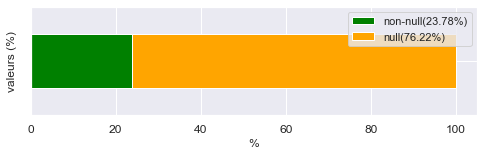

In [7]:
verifier_taille(df0, False)


In [8]:

afficher_echantillon(df0)

Voici un sous-échantillon aléatoire :


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
169107,0875083000106,http://world-fr.openfoodfacts.org/produit/0875...,usda-ndb-import,1489137089,2017-03-10T09:11:29Z,1489137090,2017-03-10T09:11:30Z,Risotto,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,-3.0,NaN,NaN
33189,0036800336094,http://world-fr.openfoodfacts.org/produit/0036...,usda-ndb-import,1489055261,2017-03-09T10:27:41Z,1489055261,2017-03-09T10:27:41Z,Organic Pasta Sauce With Chunky Diced Tomatoes...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN
60531,0049022902176,http://world-fr.openfoodfacts.org/produit/0049...,usda-ndb-import,1489074631,2017-03-09T15:50:31Z,1489074631,2017-03-09T15:50:31Z,Raw Deluxe Mixed Nuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,NaN,NaN
171289,0888670007181,http://world-fr.openfoodfacts.org/produit/0888...,usda-ndb-import,1489092223,2017-03-09T20:43:43Z,1489092223,2017-03-09T20:43:43Z,Organic Salted Butter,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,25.0,NaN,NaN
94673,0077890361177,http://world-fr.openfoodfacts.org/produit/0077...,usda-ndb-import,1489072656,2017-03-09T15:17:36Z,1489072656,2017-03-09T15:17:36Z,Sparkling Water,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145865,0786831019557,http://world-fr.openfoodfacts.org/produit/0786...,usda-ndb-import,1489053325,2017-03-09T09:55:25Z,1489053325,2017-03-09T09:55:25Z,All Natural Raisins,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,NaN,NaN


In [9]:
valeurs_manquantes(df0)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Ouverture du fichier CSV en téléchargement : https://databank.worldbank.org/data/download/Edstats_csv.zip
df = dd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', assume_missing=True, low_memory=low_memory, parse_dates=['created_t','last_modified_t'],
dtype={'allergens': 'object',
       'allergens_fr': 'object',
       'categories': 'object',
       'categories_fr': 'object',
       'categories_tags': 'object',
       'cities': 'object',
       'cities_tags': 'object',
       'code': 'object',
       'emb_codes': 'object',       
       'emb_codes_tags': 'object',
       'first_packaging_code_geo': 'object',
       'generic_name': 'object',
       'image_small_url': 'object',
       'image_url': 'object',
       'ingredients_from_palm_oil_tags': 'object',
       'ingredients_that_may_be_from_palm_oil_tags': 'object',
       'labels': 'object',
       'labels_fr': 'object',
       'labels_tags': 'object',
       'main_category': 'object',
       'main_category_fr': 'object',
       'manufacturing_places': 'object',
       'manufacturing_places_tags': 'object',
       'origins': 'object',
       'origins_tags': 'object',
       'packaging': 'object',
       'packaging_tags': 'object',
       'pnns_groups_1': 'object',
       'pnns_groups_2': 'object',
       'purchase_places': 'object',
       'stores': 'object',
       'traces': 'object',
       'traces_fr': 'object',
       'traces_tags': 'object',          
       }) #le fichier doit être placé dans le même répertoire que ce notebook

if not low_memory:
       df = df.persist() #Si assez de RAM dispo, cele permettera d'accéler les futurs traitements

In [11]:
df.describe().compute()  

C:\Python39\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,4.440000e+02,118.000000,1.600000,...,6.487500,0.000000,15.000000,35.250000,NaN,148.900000,2.000000,2.000000,NaN,NaN
50%,NaN,2.000000,0.000000,NaN,0.000000,NaN,NaN,1.205000e+03,502.000000,7.600000,...,7.200000,32.000000,15.000000,53.500000,NaN,199.700000,11.000000,11.000000,NaN,NaN
75%,NaN,4.000000,0.000000,NaN,0.000000,NaN,NaN,1.795000e+03,1200.000000,22.000000,...,7.600000,56.150000,15.000000,70.000000,NaN,828.000000,17.000000,17.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


In [12]:
df.shape[0].compute()

320772

In [13]:
df.head(1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
npartitions=13,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object,object,object,float64,float64,object,float64,float64,object,float64,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,flo

Le data set contient :
	- 320772 lignes et 162 colonnes.
	- 39608589 valeurs manquantes, ce qui représente 76.22 % du data set.


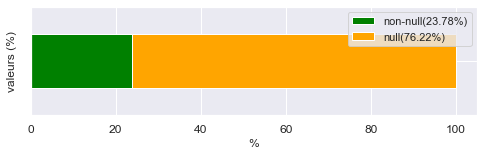

In [15]:
verifier_taille(df)


In [16]:

afficher_echantillon(df).compute()

Voici un sous-échantillon aléatoire :


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
15370,0099482417987,http://world-fr.openfoodfacts.org/produit/0099...,usda-ndb-import,1489066027,2017-03-09T13:27:07Z,1489066028,2017-03-09T13:27:08Z,Organic Strawberry Fruit Strip,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,NaN,NaN
8782,0819269011982,http://world-fr.openfoodfacts.org/produit/0819...,usda-ndb-import,1489067545,2017-03-09T13:52:25Z,1489067546,2017-03-09T13:52:26Z,"Beetnik, Organic Chicken Meatballs With Marina...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-6.0,-6.0,NaN,NaN
14673,24475181,http://world-fr.openfoodfacts.org/produit/2447...,date-limite-app,1483468198,2017-01-03T18:29:58Z,1489412191,2017-03-13T13:36:31Z,Schalotten Lang,NaN,250 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22013,40193090,http://world-fr.openfoodfacts.org/produit/4019...,date-limite-app,1483781336,2017-01-07T09:28:56Z,1492168003,2017-04-14T11:06:43Z,Frischkäse Meerrettich,NaN,150 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19077,6111018501527,http://world-fr.openfoodfacts.org/produit/6111...,amine,1362426243,2013-03-04T19:44:03Z,1362606210,2013-03-06T21:43:30Z,Nescafé Classic,Café soluble,45 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10744,8009643195014,http://world-fr.openfoodfacts.org/produit/8009...,sebleouf,1480867772,2016-12-04T16:09:32Z,1490975273,2017-03-31T15:47:53Z,Petits Calmars Marinés,NaN,200 g,...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,NaN,NaN


In [17]:
valeurs_manquantes(df).compute()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27646,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27647,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
27648,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27649,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
